<a href="https://colab.research.google.com/github/LilibethDehorta/machine-learning/blob/main/Proyecto_AP_no_supervisado_Ecomm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto #2 Aprendizaje no supervisado

---
###Conjunto de datos tomados de www.Kaggle.com
Los datos corresponden a comercio electronico
  <https://drive.google.com/file/d/1GZCmp9FFZTK01QzWJwjYBj1emb8hlhU_/view?usp=sharing>

  Los datos correspoden a registros de compras en un comercio electronico y desea clasificar si las compras llegaran a tiempo o retrasado. Por lo que registran las siguientes variables:
  ID, Almacen (A,B,C,D y F), Modo de envio(ship,flight y road), N° de llamadas atención del cliente, puntuación del cliente, costos del producto, compras anteriores, importancia del producto(low, medium y high), genero(F y M), descuento ofrecido, peso en gramos y *entregado a tiempo*




In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [23]:
ecommerce =  pd.read_csv("Ecommerce.csv")

In [24]:
pruebas=pd.DataFrame()

In [25]:
pruebas["Reached.on.Time_Y.N"]= ecommerce["Reached.on.Time_Y.N"]
envio= ecommerce["Reached.on.Time_Y.N"]

In [26]:
pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 64.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ff02fdbbead0ed880167c00ceaef54ed42ed1dbb1f2d5d47f36b727c1e647900
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

In [ ]:
from pandas_profiling import ProfileReport
ProfileReport(ecommerce)

<ipython-input-6-c3fac29f40e0>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Depuración y transformación de datos
Modificar las variables: Warehouse_block, Mode_of_Shipment, Product_importance, Gender

Eliminar la variable: ID  de la data.
Se realizaran de 2 formas:


1.   Generando variables como dummies
2.   Convirtiendo de categorico a numerico



#### Generando variables dummies  


---

El archivo **decommerce** se cambiaron las variables

In [27]:
genero = pd.get_dummies(ecommerce['Gender'])
almac = pd.get_dummies(ecommerce['Warehouse_block'])
envio = pd.get_dummies(ecommerce['Mode_of_Shipment'])
prod = pd.get_dummies(ecommerce['Product_importance'])

In [28]:
envio=ecommerce['Reached.on.Time_Y.N']
ecommer1 = pd.concat([ecommerce.drop("Gender", axis = 1), genero,almac,envio,prod], axis = 1)

In [29]:
decommer = ecommer1.drop(columns=['ID',  'Warehouse_block','Mode_of_Shipment','Product_importance'])
decommer.head(8)

Customer_care_calls  Customer_rating  Cost_of_the_Product  Prior_purchases  \
0                    4                2                  177                3   
1                    4                5                  216                2   
2                    2                2                  183                4   
3                    3                3                  176                4   
4                    2                2                  184                3   
5                    3                1                  162                3   
6                    3                4                  250                3   
7                    4                1                  233                2   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  F  M  A  B  C  D  F  \
0                44           1233                    1  1  0  0  0  0  1  0   
1                59           3088                    1  0  1  0  0  0  0  1   
2                48           3374                    1  0  1  1  0  0  0  0   
3                10           1177                    1  0  1  0  1  0  0  0   
4                46           2484                    1  1  0  0  0  1  0  0   
5                12           1417                    1  1  0  0  0  0  0  1   
6                 3           2371                    1  1  0  0  0  0  1  0   
7                48           2804                    1  1  0  0  0  0  0  1   

   Reached.on.Time_Y.N  high  low  medium  
0                    1     0    1       0  
1                    1     0    1       0  
2                    1     0    1       0  
3                    1     0    0       1  
4                    1     0    0       1  
5                    1     0    0       1  
6                    1     0    1       0  
7                    1     0    1       0

##### Convirtiendo de categorico a numerico

In [30]:
from sklearn.preprocessing import OrdinalEncoder

In [31]:
necommer=ecommerce.drop(columns=['ID'])

In [32]:
enc = OrdinalEncoder()
enc.fit(necommer[["Gender","Warehouse_block","Mode_of_Shipment", "Product_importance"]])
necommer[["Gender","Warehouse_block","Mode_of_Shipment", "Product_importance"]] = enc.transform(necommer[["Gender","Warehouse_block","Mode_of_Shipment", "Product_importance"]])

In [ ]:
necommer.head(8)

Warehouse_block  Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0              3.0               0.0                    4                2   
1              4.0               0.0                    4                5   
2              0.0               0.0                    2                2   
3              1.0               0.0                    3                3   
4              2.0               0.0                    2                2   
5              4.0               0.0                    3                1   
6              3.0               0.0                    3                4   
7              4.0               0.0                    4                1   

   Cost_of_the_Product  Prior_purchases  Product_importance  Gender  \
0                  177                3                 1.0     0.0   
1                  216                2                 1.0     1.0   
2                  183                4                 1.0     1.0   
3                  176                4                 2.0     1.0   
4                  184                3                 2.0     0.0   
5                  162                3                 2.0     0.0   
6                  250                3                 1.0     0.0   
7                  233                2                 1.0     0.0   

   Discount_offered  Weight_in_gms  
0                44           1233  
1                59           3088  
2                48           3374  
3                10           1177  
4                46           2484  
5                12           1417  
6                 3           2371  
7                48           2804

### Diferentes Escalado delos datos
---
preprocessing.MaxAbsScaler,
preprocessing.MinMaxScaler,  preprocessing.RobustScaler,
 preprocessing.StandardScaler

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(decommer)
minmaxf=scaler.transform(decommer)
sc_minmax=pd.DataFrame(minmaxf)


In [35]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaler.fit(decommer)
maxabsf=scaler.transform(decommer)
sc_maxabs=pd.DataFrame(maxabsf)

In [36]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(decommer)
robusf=scaler.transform(decommer)
sc_robus=pd.DataFrame(robusf)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(decommer)
standf=scaler.transform(decommer)
sc_stand=pd.DataFrame(standf)

## Modelos de aprendizaje no supervisado

In [38]:
!pip install umap-learn

### Knn con 2 cluster

In [39]:
from sklearn.decomposition import PCA
import umap
#import hdbscan
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

#### Para el conjunto con variables dummies (decommer)

In [ ]:
standard_embedding = umap.UMAP(random_state=42, n_components=2).fit_transform(decommer)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


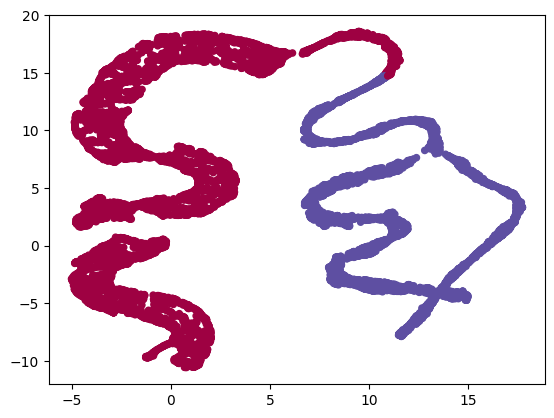

In [ ]:
import sklearn.cluster as cluster
kmeans_labels = cluster.KMeans(n_clusters=2).fit_predict(decommer)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=kmeans_labels, s=20, cmap='Spectral');

In [ ]:
pruebas["target_knn"]=kmeans_labels

In [ ]:
pruebas["errr_knn"]=pruebas["Reached.on.Time_Y.N"]-pruebas["target_knn"]

In [ ]:
len(pruebas[pruebas["errr_knn"]==0])/len(pruebas)*100

61.33284844076734

#### Para el conjunto con variables numericas (**necommer**)

In [ ]:
standard_embedding = umap.UMAP(random_state=42, n_components=2).fit_transform(necommer)

In [ ]:
kmeans_labels = cluster.KMeans(n_clusters=2).fit_predict(necommer)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
pruebas["target_knn1"]=kmeans_labels

In [ ]:
pruebas["errr_knn1"]=pruebas["Reached.on.Time_Y.N"]-pruebas["target_knn1"]
len(pruebas[pruebas["errr_knn1"]==0])/len(pruebas)*100

38.66715155923266

####Resultados de aplicar KNN a los datos


1.  Datos con variables dummies    61.33%
2.  Datos con variables categorico a numerico   38,67%





### Sin escala UMAP

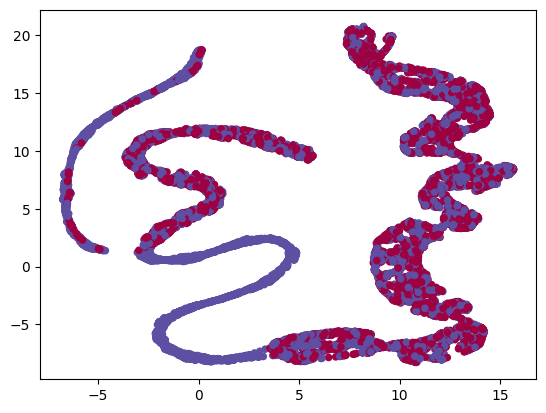

In [ ]:
standard_embedding = umap.UMAP(random_state=42, n_components=2, metric='chebyshev').fit_transform(decommer)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=envio, s=20, cmap='Spectral')

In [ ]:
pruebas["UMAP1"],pruebas["UMAP2"]=standard_embedding[:,0],standard_embedding[:,1]

In [ ]:
pruebas["target_umap"]=np.where(pruebas["UMAP1"]<=5.5,1,0)

In [ ]:
pruebas["errr_umap"]=pruebas["Reached.on.Time_Y.N"]-pruebas["target_umap"]
len(pruebas[pruebas["errr_umap"]==0])/len(pruebas)*100


67.23338485316846

####Resultados sin escalar
 con diferentes metricas pero con los datos convertidos a númericos pues con las variables dummies reduce el porcentaje de aciertos del modelo.

\begin{array}{c} \hline
Metricas & Coincidencia  \\ \hline
manhattan &   67,02\% \\
chebyshev & 67,23\%  \\
minkowski & 67,04\%\\
braycurtis & 67\%  \\ \hline
\end{array}

### Umap sin escala con transformacion

In [40]:
from sklearn.preprocessing import QuantileTransformer, FunctionTransformer, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [ ]:
# Preprocess again
pipe = make_pipeline(SimpleImputer(strategy="median"),QuantileTransformer())
X = pipe.fit_transform(decommer.copy())

# Fit UMAP to processed data
manifold = umap.UMAP(random_state=42, metric="manhattan").fit(X)
X_reduced_1 = manifold.transform(X)

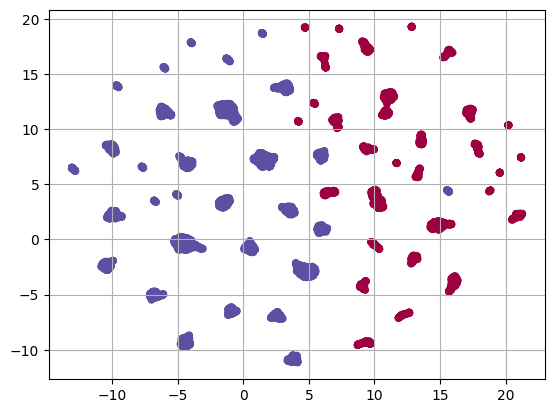

In [ ]:
plt.scatter(X_reduced_1[:, 0], X_reduced_1[:, 1], s=20,c=envio, cmap='Spectral');
plt.grid()

In [ ]:
pruebas["UMAPT1"],pruebas["UMAPT2"]=X_reduced_1[:,0],X_reduced_1[:,1]

In [ ]:
pruebas["target_umapt"]=np.where((pruebas["UMAPT1"]<=7),1,0)

In [ ]:
pruebas["errr_umapt"]=pruebas["Reached.on.Time_Y.N"]-pruebas["target_umapt"]
len(pruebas[pruebas["errr_umapt"]==0])/len(pruebas)*100

94.79043549413582

In [19]:
# Preprocess again PowerTransformer FunctionTransformer
pipe = make_pipeline(SimpleImputer(strategy="median"),FunctionTransformer())
X = pipe.fit_transform(decommer.copy())

# Fit UMAP to processed data
manifold = umap.UMAP(random_state=42, metric="chebyshev").fit(X)
X_reduced_1 = manifold.transform(X)

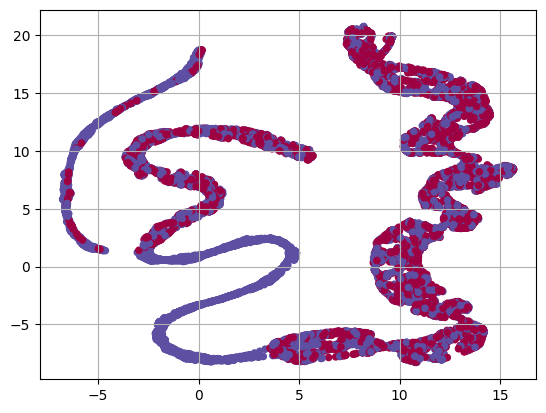

In [20]:
plt.scatter(X_reduced_1[:, 0], X_reduced_1[:, 1], s=20,c=envio, cmap='Spectral');
plt.grid()

In [ ]:
pruebas["UMAPTF1"],pruebas["UMAPTF2"]=X_reduced_1[:,0],X_reduced_1[:,1]

In [ ]:
pruebas["target_umaptf"]=np.where((pruebas["UMAPTF1"]<=5.5),1,0)

In [ ]:
pruebas["errr_umaptf"]=pruebas["Reached.on.Time_Y.N"]-pruebas["target_umaptf"]
len(pruebas[pruebas["errr_umaptf"]==0])/len(pruebas)*100

67.23338485316846

#### Resultados:

      

\begin{array}{c} \hline
   &  Transformaciones  & \\ \hline
 Metricas & QuantileTransf. & FunctionTransf. & PowerTransfor. \\ \hline
 manhattan & 94,79\% & 67,02 \% & un grupo\\
chebyshev & un grupo & 67,02\% & un grupo\\
minkowski & 58,41\%  & 59,67\% & 46,43\% \\
braycurtis & 59,67\% & 65,61\% &  un grupo \\ \hline
\end{array}

Cuando se aplican algunas transformaciones y aplicando UMAP con algunas metricas no separa en dos grupos, se distribuye todo el plano sin dividirse claramente los grupos.

### Scaler UMAP

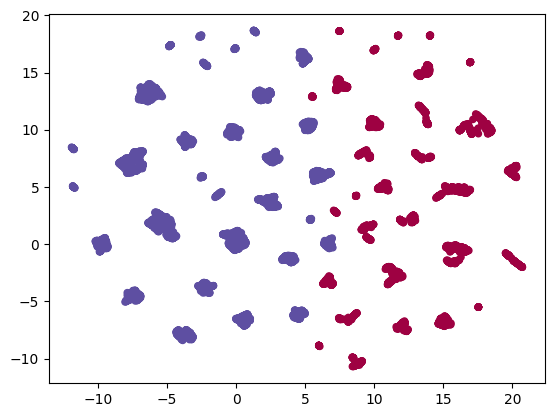

In [ ]:
standard_embedding = umap.UMAP(random_state=42, n_components=2,metric='manhattan').fit_transform(sc_minmax)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=envio, s=20, cmap='Spectral')

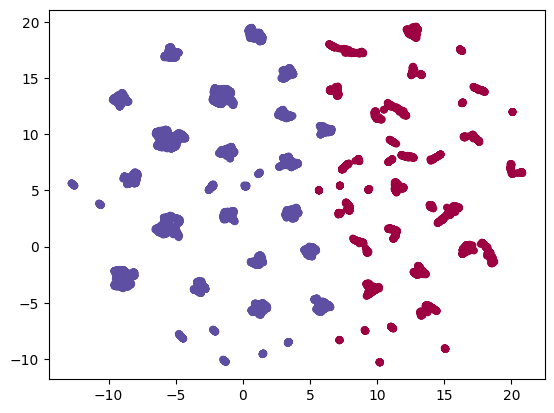

In [ ]:
standard_embedding = umap.UMAP(random_state=42, n_components=2, metric='manhattan').fit_transform(sc_maxabs)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=envio, s=20, cmap='Spectral')

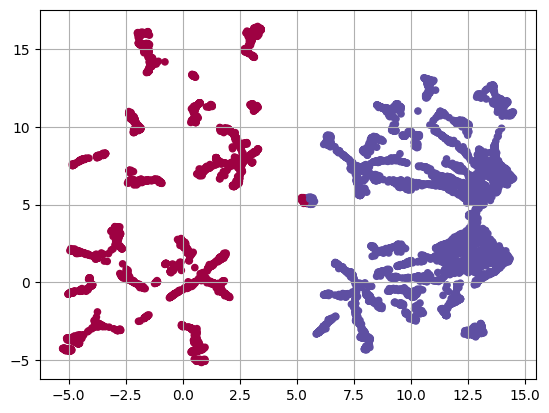

In [ ]:
standard_embedding = umap.UMAP(random_state=42, n_components=2, metric='manhattan').fit_transform(sc_robus)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], s=20,c=envio, cmap='Spectral')
plt.grid()

In [ ]:
pruebas["UMAPS1"],pruebas["UMAPS2"]=standard_embedding[:,0],standard_embedding[:,1]

In [ ]:
pruebas["target_umaps"]=np.where((pruebas["UMAPS1"]<=5.2),0,1)

In [ ]:
pruebas["errr_umaps"]=pruebas["Reached.on.Time_Y.N"]-pruebas["target_umaps"]
len(pruebas[pruebas["errr_umaps"]==0])/len(pruebas)*100

99.31811982907537

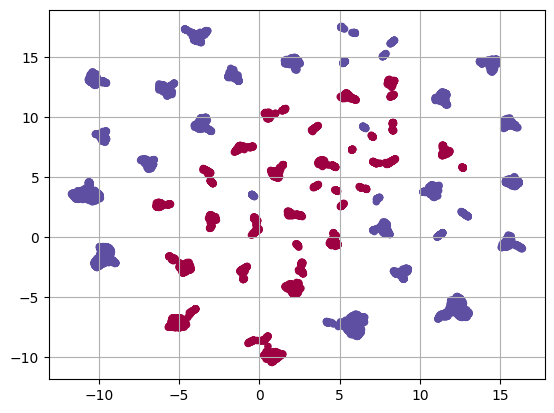

In [21]:
standard_embedding = umap.UMAP(random_state=42, n_components=2, metric='manhattan').fit_transform(sc_stand)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], s=20,c=envio, cmap='Spectral')
plt.grid()

##### **Resultados**
Se realizo diversas preprocesamiento de los datos modificando la escala con minimo-maximo, maximo-absoluto, robusto y estandarización. Con la metrica "*manhattan"* ya que con estas se encontraron mejores resultados en los items anteriores.

Pero se puede observar que con con la escala robusta se ajusto a un 99.3%.


### Scaler UMAP con transformación

In [73]:
from sklearn.preprocessing import QuantileTransformer, FunctionTransformer, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Preprocess again
pipe = make_pipeline(SimpleImputer(strategy="median"), FunctionTransformer())
X = pipe.fit_transform(sc_robus.copy())

# Fit UMAP to processed data
manifold = umap.UMAP(n_neighbors=50,random_state=42,metric='manhattan',angular_rp_forest=True).fit(X)
X_reduced_2 = manifold.transform(X)

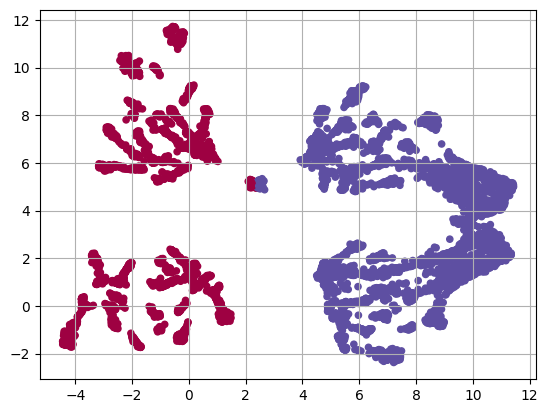

In [74]:
plt.scatter(X_reduced_2[:, 0], X_reduced_2[:, 1], s=20, c=envio, cmap='Spectral');
plt.grid()

In [75]:
pruebas["UMAPTS1"],pruebas["UMAPTS2"]=X_reduced_2[:, 0], X_reduced_2[:, 1]

In [76]:
pruebas["target_umapts"]=np.where((pruebas["UMAPTS1"]<2.5),0,1)

In [77]:
pruebas["errr_umapts"]=pruebas["Reached.on.Time_Y.N"]-pruebas["target_umapts"]
len(pruebas[pruebas["errr_umapts"]==0])/len(pruebas)*100

99.59996363305756

In [78]:
from sklearn.preprocessing import QuantileTransformer, FunctionTransformer, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Preprocess again
pipe = make_pipeline(SimpleImputer(strategy="median"), FunctionTransformer())
X = pipe.fit_transform(sc_stand.copy())

# Fit UMAP to processed data
manifold = umap.UMAP(n_neighbors=50,random_state=42,metric='manhattan',angular_rp_forest=True).fit(X)
X_reduced_2 = manifold.transform(X)

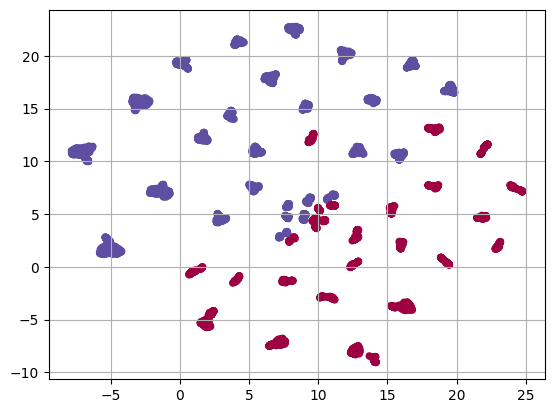

In [79]:
plt.scatter(X_reduced_2[:, 0], X_reduced_2[:, 1], s=20, c=envio, cmap='Spectral');
plt.grid()

##### **Resultado**
Al aplicar las transformaciones QuantileTransformer, FunctionTransformer y PowerTransformer se encontró que la segunda transformación con el escalamiento robusto se encontraron dos grupos separados casi perfectos en un 99.6%, mientras que las otras combinaciones de escalamiento y transformaciones no se apreciaba la clasificación requerida.